# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>


Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the [PACE Strategy Document ](https://docs.google.com/document/d/1iSHdbfQR6w8RClJNWai8oJXn9tQmYoTKn6QohuaK4-s/template/preview?resourcekey=0-ZIHnbxL1dd2u9A47iEVXvg).

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.



### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [93]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Waze colors
waze_blue = '#007CFF'
waze_yellow = '#FFB900'
waze_green = '#52CC52'
waze_red = '#FF3B30'


# Define Waze Box Plot Plot
def waze_box_plot(data, column, title, rmoutliers=True, **kwargs):
    """
    This function creates a box plot of a specified column in a pandas DataFrame,
    highlighting potential outliers identified using z-scores.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to be visualized.
        title (str): The title for the plot.
        rmoutliers (bool, optional): Flag to remove half of the outliers from the plot 
            for better visualization (defaults to True). If False, outliers are 
            visually shown on the graph. If provided a number, it will set manually 
            the length for the Y axis.
        **kwargs: Additional arguments passed to seaborn.boxplot

    Returns:
        None
    """
        
    # Calculate mean and median
    mean_value = data[column].mean()
    median_value = data[column].median()

    try:
        # Calculate z-scores
        z_scores = (data[column] - mean_value) / data[column].std()
        # Identify and sort outliers (absolute z-score > 3)
        outliers = data[column][np.abs(z_scores) > 3].sort_values(ascending=True)
        # Select the first half (rounded down) of outliers
        quarter_outliers = outliers.iloc[int(len(outliers) * 0.5) - 1]
    except IndexError:
        outliers = []

    # Create Box plot with Seaborn
    fig = plt.figure(figsize=(5, 3))
    sns.boxplot(x=data[column],
                orient='h',  # Set horizontal orientation
                color=waze_blue,  # Box color
                width=0.3,  # Box width
                whiskerprops=dict(color=waze_yellow),  # Whisker color
                capprops=dict(color=waze_yellow),  # Cap color
                medianprops=dict(color=waze_green),  # Median line color
                flierprops=dict(marker='o', color=waze_yellow, markersize=5), # Outlier color
                **kwargs) # from the sns.boxplot() function

    # Customize the plot
    plt.yticks([])  # Remove the y-axis ticks
    plt.ylabel('')  # Remove the y-axis label
    plt.title(title)

    # Plot out outliers as different markers (optional)
    if len(outliers) > 0 and rmoutliers == True:
        plt.gca().spines['right'].set_visible(False) # Remove left line to be substituted by yellow dotted
        plt.xlim(0, quarter_outliers)  # Set the limits of the X axis to omit part of the outliers
        cut_line = plt.axvline(x=quarter_outliers, color=waze_yellow, linestyle='--', label='Outlier Cut')  # Add a vertical line to indicate the cut
        plt.legend(handles=[cut_line])  # Add only the cut line to the legend
    elif rmoutliers != True and rmoutliers != False:
        plt.gca().spines['right'].set_visible(False) # Remove left line to be substituted by yellow dotted
        plt.xlim(0, rmoutliers)  # Set the limits of the X axis to omit part of the outliers
        plt.axvline(x=rmoutliers, color=waze_yellow, linestyle='--')  # Add a vertical line to indicate the cut
        cut_line = plt.axvline(x=rmoutliers, color=waze_yellow, linestyle='--', label='Outlier Cut')  # Add a vertical line to indicate the cut
        plt.legend(handles=[cut_line])  # Add only the cut line to the legend

    # Add lines for mean and median
    plt.axvline(x=mean_value, color=waze_red, linestyle='--', label='Mean')
    plt.axvline(x=median_value, color=waze_green, linestyle='-', label='Median')

    # Add legend
    plt.legend()

    # Render
    plt.show()
    
# Define Waze Histogram Plot
def waze_histogram_plot(data, column, title, rmoutliers=True, bins_size=100, **kwargs):
    """
    This function creates a histogram of a specified column in a pandas DataFrame,
    highlighting potential outliers identified using z-scores.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to be visualized.
        title (str): The title for the plot.
        rmoutliers (bool, optional): Flag to remove half of the outliers from the plot 
            for better visualization (defaults to True). If False, outliers are 
            visually shown on the graph. If provided a number, it will set manually 
            the length for the Y axis.
        bins_size (int, optional): The number of bins to use in the histogram (defaults to 100).
        **kwargs: Additional arguments passed to seaborn.histplot

    Returns:
        None
    """
        
    # Calculate mean and median
    mean_value = data[column].mean()
    median_value = data[column].median()

    try:
        # Calculate z-scores
        z_scores = (data[column] - mean_value) / data[column].std()
        # Identify and sort outliers (absolute z-score > 3)
        outliers = data[column][np.abs(z_scores) > 3].sort_values(ascending=True)
        # Select the first half (rounded down) of outliers
        quarter_outliers = outliers.iloc[int(len(outliers) * 0.5) - 1]
    except IndexError:
        outliers = []

    # Create histogram with Seaborn
    plt.figure(figsize=(5, 3))
    sns.histplot(data[column], bins=bins_size, color=waze_blue, kde=False, **kwargs)
    
    # Customize the plot
    plt.title(title, y=1.05)  # Set the title higher

    # Plot out outliers as different markers (optional)
    if len(outliers) > 0 and rmoutliers == True:
        plt.gca().spines['right'].set_visible(False) # Remove left line to be substituted by yellow dotted
        plt.xlim(0, quarter_outliers)  # Set the limits of the X axis to omit part of the outliers
        cut_line = plt.axvline(x=quarter_outliers, color=waze_yellow, linestyle='--', label='Outlier Cut')  # Add a vertical line to indicate the cut
        plt.legend(handles=[cut_line])  # Add only the cut line to the legend
    elif rmoutliers != True and rmoutliers != False:
        plt.gca().spines['right'].set_visible(False) # Remove left line to be substituted by yellow dotted
        plt.xlim(0, rmoutliers)  # Set the limits of the X axis to omit part of the outliers
        plt.axvline(x=rmoutliers, color=waze_yellow, linestyle='--')  # Add a vertical line to indicate the cut
        cut_line = plt.axvline(x=rmoutliers, color=waze_yellow, linestyle='--', label='Outlier Cut')  # Add a vertical line to indicate the cut
        plt.legend(handles=[cut_line])  # Add only the cut line to the legend

    # Add lines for mean and median
    plt.axvline(x=mean_value, color=waze_red, linestyle='--', label='Mean')
    plt.axvline(x=median_value, color=waze_green, linestyle='-', label='Median')
    
    # Annotate mean and median lines with their x-values
    plt.text(mean_value, plt.ylim()[1] - 0.07 * (plt.ylim()[1] - plt.ylim()[0]), f'{mean_value:.2f}', ha='center', va='bottom', color=waze_red)
    plt.text(median_value, plt.ylim()[1], f'{median_value:.2f}', ha='center', va='bottom', color=waze_green)
    
    # Add legend
    plt.legend()

    # Render
    plt.show()

# Define Waze Pie Chart
def waze_pie_chart(data, column, title):
    """
    This function creates a pie chart of a specified categorical column in a pandas DataFrame.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        column (str): The name of the categorical column to be visualized.
        title (str): The title for the plot.

    Returns:
        None
    """
    
    # Count occurrences of each category
    category_counts = data[column].value_counts()
    
    # Extract category labels and counts
    labels = category_counts.index.tolist()
    counts = category_counts.values.tolist()
    
    # Define custom Waze colors
    waze_colors = ['#007CFF', '#FFB900', '#52CC52', '#FF3B30', '#FF1493', '#FFD700', '#9ACD32']
    
    # Plot pie chart
    plt.figure(figsize=(5, 3))
    plt.pie(counts, labels=labels, colors=waze_colors, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    # Show plot
    plt.show()

def waze_bar_comparison_plot(data, column1, column2, title, bins_size=100, **kwargs):
    """
    Create a bar plot comparing two specified columns in a pandas DataFrame.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        column1 (str): The name of the first column to be visualized.
        column2 (str): The name of the second column to be visualized.
        title (str): The title for the plot.
        bins_size (int, optional): The number of bins to use in the histogram (default 100).
        **kwargs: Additional arguments passed to seaborn.histplot.

    Returns:
        None
    """
    # Calculate statistics for column1
    mean_value1, median_value1 = data[column1].mean(), data[column1].median()

    # Calculate statistics for column2
    mean_value2, median_value2 = data[column2].mean(), data[column2].median()
    
    # Create a DataFrame for plotting
    data_long = pd.melt(data[[column1, column2]], var_name='Category', value_name='Values')

    # Create the plot
    plt.figure(figsize=(6, 3))
    sns.histplot(data=data_long, x='Values', hue='Category', element='bars', bins=bins_size, multiple='dodge', shrink=0.8,
                 palette={column1: waze_blue, column2: waze_yellow}, **kwargs)

    # Add lines for mean and median for column1
    for value, color, linestyle, label in [(mean_value1, waze_red, '-.', 'Mean'), (median_value1, waze_green, '-.', 'Median')]:
        plt.axvline(x=value, color=color, linestyle=linestyle, label=f'{column1.replace("_", " ").capitalize()} {label}')

    # Add lines for mean and median for column2
    for value, color, linestyle, label in [(mean_value2, waze_red, '--', 'Mean'), (median_value2, waze_green, '--', 'Median')]:
        plt.axvline(x=value, color=color, linestyle=linestyle, label=f'{column2.replace("_", " ").capitalize()} {label}')

    # Customize the plot
    plt.title(title)
    plt.xlabel(column1.replace('_', ' ').capitalize() + ' and ' + column2.replace('_', ' ').capitalize())
    plt.ylabel('Count')
    plt.legend()
    plt.tight_layout()
    plt.show()

def waze_scatter_plot(data, x_column, y_column, title):
    """
    Create a scatter plot of two specified columns in a pandas DataFrame with a diagonal line.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to be plotted on the x-axis.
        y_column (str): The name of the column to be plotted on the y-axis.
        title (str): The title for the plot.

    Returns:
        None
    """
    # Create scatter plot
    plt.figure(figsize=(6, 3))
    plt.scatter(data[x_column], data[y_column], color=waze_blue, alpha=0.5)
    plt.title(title)
    plt.xlabel(x_column.replace('_', ' ').capitalize())
    plt.ylabel(y_column.replace('_', ' ').capitalize())
    
    # Plot diagonal line
    plt.plot(np.arange(data[x_column].min(), data[x_column].max()), np.arange(data[x_column].min(), data[x_column].max()), color=waze_red, linestyle='--')
    
    plt.grid(True)
    plt.show()

def waze_histogram_qualitative_plot(data, column1, column2, title, waze_colors=None):
    """
    Create a bar plot of two specified qualitative columns in a pandas DataFrame.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        column1 (str): The name of the column indicating the device (e.g., 'Device').
        column2 (str): The name of the column indicating the retention status (e.g., 'Status').
        title (str): The title for the plot.
        waze_colors (list, optional): List of colors to use for the different categories. Defaults to None.

    Returns:
        None
    """

    if waze_colors is None:
        waze_colors = ['#007CFF', '#FFB900', '#52CC52', '#FF3B30', '#FF1493', '#FFD700', '#9ACD32']

    # Get unique status values and assign colors
    unique_statuses = data[column2].unique()
    palette = {status: waze_colors[i % len(waze_colors)] for i, status in enumerate(unique_statuses)}

    # Create the plot
    plt.figure(figsize=(5, 3))
    hist_plot = sns.histplot(data=data, x=column1, hue=column2, multiple="dodge", shrink=0.8, palette=palette)

    # Customize the plot
    plt.title(title)
    plt.xlabel(column1.replace('_', ' ').capitalize())
    plt.ylabel('Count')

    # Get legend handles and labels directly (correct order)
    handles, labels = hist_plot.get_legend_handles_labels()

    # Add legend (if there are labels)
    if labels:
        plt.legend(handles, labels, title=column2.replace('_', ' ').capitalize(), loc='upper right')

    plt.tight_layout()
    plt.show()

def waze_histogram_quantitative_vs_qualitative_plot(data, column1, column2, title, max_column1_value=None, bins_size=50, **kwargs):
    """
    Create a histogram of one quantitative column and one qualitative column, with bars showing the percent.
    
    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        column1 (str): The name of the column indicating the quantitative data (e.g., kilometers per driving day).
        column2 (str): The name of the column indicating the qualitative data (e.g., retention status).
        title (str): The title for the plot.
        max_column1_value(int, optional): Maximum value to consider for column1. If None, no filtering occurs (default None).
        bins_size (int, optional): Number of bins for the histogram (default 10).
        **kwargs: Additional arguments passed to seaborn.histplot.

    Returns:
        None
    """

    waze_colors = ['#007CFF', '#FFB900', '#52CC52', '#FF3B30', '#FF1493', '#FFD700', '#9ACD32']

    # Filter data
    if max_column1_value is not None:
        data_filtered = data[data[column1] <= max_column1_value]
    else:
        data_filtered = data

    # Get unique status values and assign colors
    unique_statuses = data_filtered[column2].unique()
    palette = {status: waze_colors[i % len(waze_colors)] for i, status in enumerate(unique_statuses)}

    # Create the plot
    plt.figure(figsize=(6, 4))
    hist_plot = sns.histplot(data=data_filtered, x=column1, hue=column2, multiple="fill", bins=bins_size, palette=palette, **kwargs)

    # Customize the plot
    plt.title(title)
    plt.xlabel(column1.replace('_', ' ').capitalize())
    plt.ylabel('Proportion')

    # Get legend handles and labels directly (correct order)
    handles, labels = hist_plot.get_legend_handles_labels()

    # Add legend (if there are labels)
    if labels:
        plt.legend(handles, labels, title=column2.replace('_', ' ').capitalize(), loc='upper right')

    plt.tight_layout()
    plt.show()





Read in the data and store it as a dataframe object called df.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [14]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?

2. Are there any variables that have missing data?


1. We already completed data analysis last time, so the data is structured. 
2. Recap from last time, "label" columns missing 700 rows.

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







1. "label" columns
2. "ID" columns
3. Check missing data by using info() functions. To handle, we can either delete, re-fill data.
4. Outliers refer to unreasonable data, there are no standed method for this. 

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [15]:
### YOUR CODE HERE ###
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [488]:
### YOUR CODE HERE ###
df.size

194987

Generate summary statistics using the `describe()` method.

In [489]:
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [490]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

1. Check unreasonable data for outliers. For example, any value found beside "churn" and "retained" in label columns considers as outliers.
2. Delete those outliers.

### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



Different results use different visualization

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

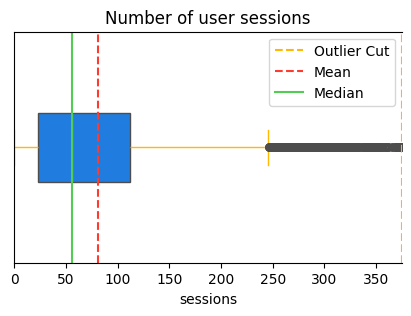

In [52]:
### YOUR CODE HERE ###
# Box plot
waze_box_plot(df, 'sessions', 'Number of user sessions')


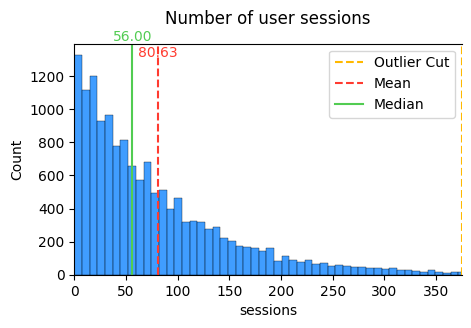

In [53]:
### YOUR CODE HERE ###
# Histogram:
waze_histogram_plot(df, 'sessions', 'Number of user sessions')


The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

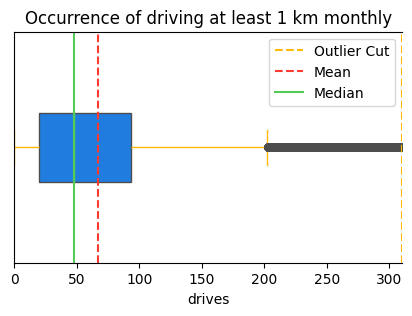

In [54]:
### YOUR CODE HERE ###
# Box plot
waze_box_plot(df, 'drives', 'Occurrence of driving at least 1 km monthly')

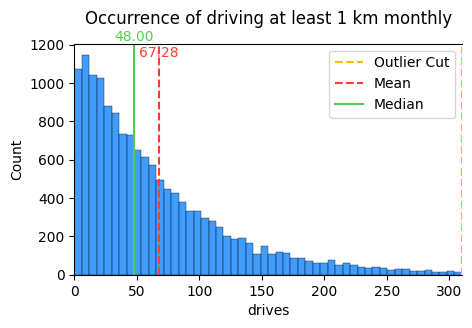

In [55]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_plot(df, 'drives', 'Occurrence of driving at least 1 km monthly')


The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

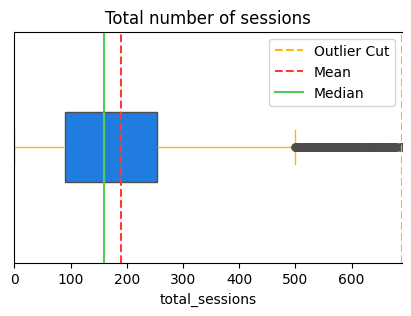

In [495]:
### YOUR CODE HERE ###
# Box plot
waze_box_plot(df, 'total_sessions', 'Total number of sessions')


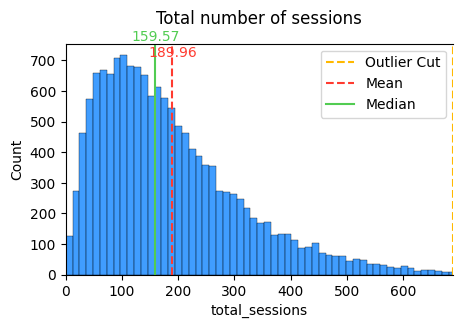

In [496]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_plot(df, 'total_sessions', 'Total number of sessions')


The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

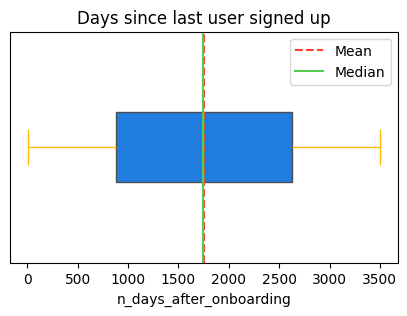

In [56]:
### YOUR CODE HERE ###
# Box plot
waze_box_plot(df, 'n_days_after_onboarding', 'Days since last user signed up')

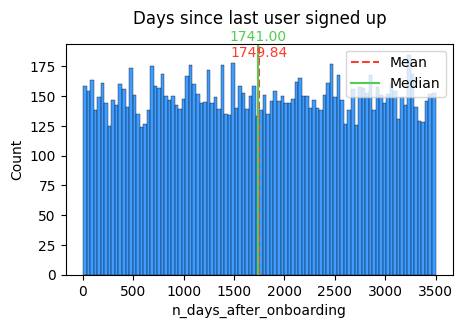

In [57]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_plot(df, 'n_days_after_onboarding', 'Days since last user signed up')

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

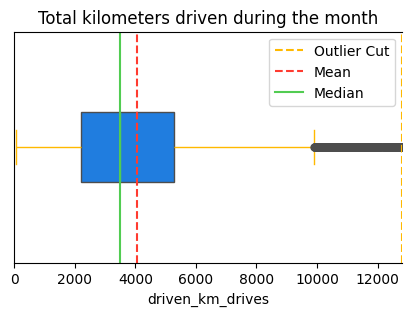

In [58]:
### YOUR CODE HERE ###
# Box plot
waze_box_plot(df, 'driven_km_drives', 'Total kilometers driven during the month')

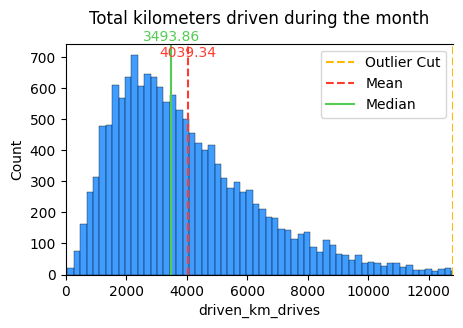

In [59]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_plot(df, 'driven_km_drives', 'Total kilometers driven during the month')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

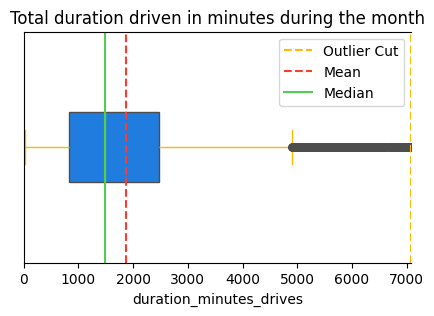

In [501]:
### YOUR CODE HERE ###
# Box plot
waze_box_plot(df, 'duration_minutes_drives', 'Total duration driven in minutes during the month')

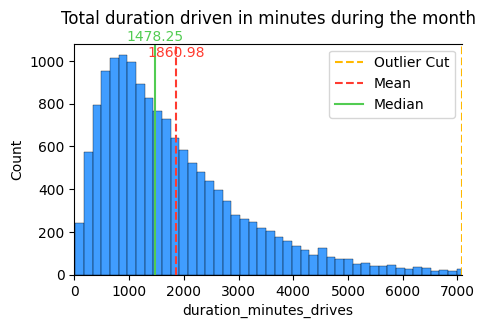

In [502]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_plot(df, 'duration_minutes_drives', 'Total duration driven in minutes during the month')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

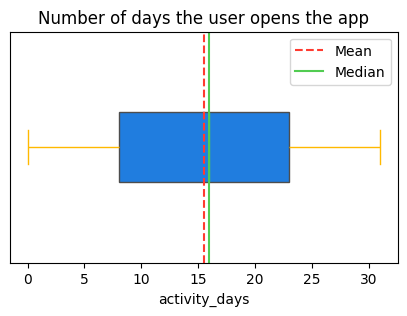

In [503]:
### YOUR CODE HERE ###
# Box plot
waze_box_plot(df, 'activity_days', 'Number of days the user opens the app')

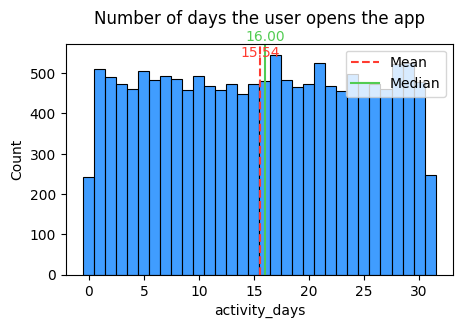

In [504]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_plot(df, 'activity_days', 'Number of days the user opens the app', discrete=True)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

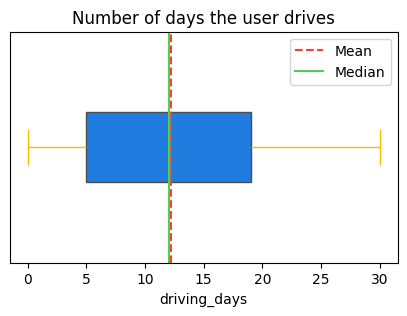

In [61]:
### YOUR CODE HERE ###
# Box plot
waze_box_plot(df, 'driving_days', 'Number of days the user drives')

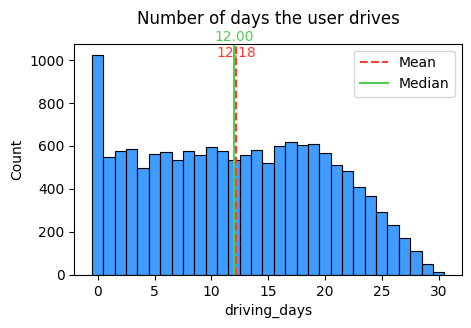

In [60]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_plot(df, 'driving_days', 'Number of days the user drives', discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

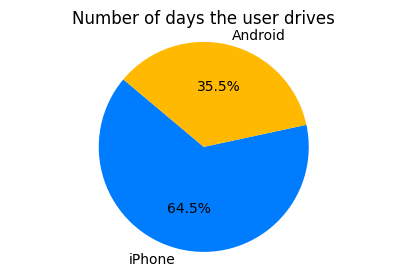

In [62]:
### YOUR CODE HERE ###
# Pie chart
waze_pie_chart(df, 'device', 'Number of days the user drives')

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

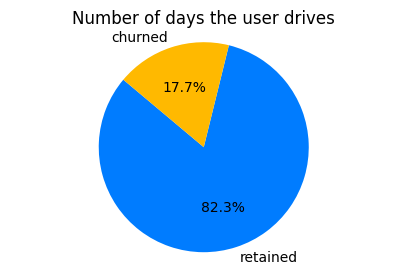

In [63]:
### YOUR CODE HERE ###
# Pie chart
waze_pie_chart(df, 'label', 'Number of days the user drives')

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

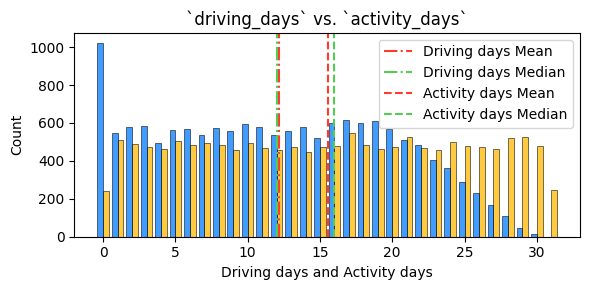

In [64]:
### YOUR CODE HERE ###
# Histogram
waze_bar_comparison_plot(df, 'driving_days', 'activity_days', "`driving_days` vs. `activity_days`", discrete=True)

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [65]:
### YOUR CODE HERE ###
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

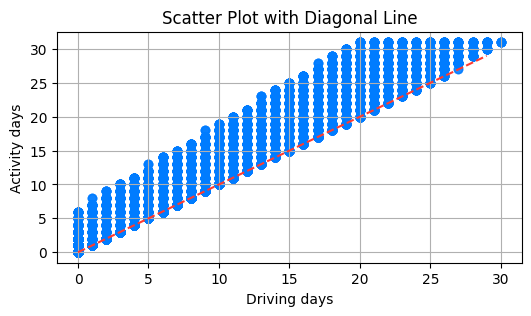

In [66]:
### YOUR CODE HERE ###
# Scatter plot
waze_scatter_plot(df, 'driving_days', 'activity_days', 'Scatter Plot with Diagonal Line')

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

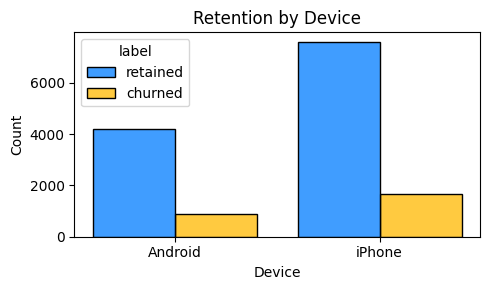

In [72]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_qualitative_plot(df, 'device', 'label', "Retention by Device")

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [41]:
### YOUR CODE HERE ###
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [42]:
### YOUR CODE HERE ###
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

In [30]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_quantitative_vs_qualitative_plot(df, 'km_per_driving_day', 'label', "Kilometers per Driving Day with Retention Status", 1200)

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

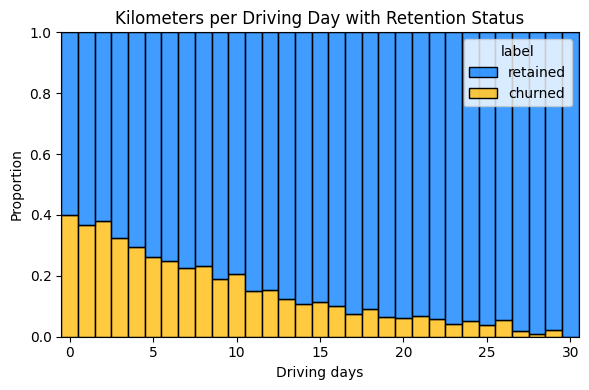

In [100]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_quantitative_vs_qualitative_plot(df, 'driving_days', 'label', "Kilometers per Driving Day with Retention Status", discrete=True)

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [101]:
### YOUR CODE HERE ###
df["percent_sessions_in_last_month"] = df["sessions"] / df["total_sessions"]

What is the median value of the new column?

In [102]:
### YOUR CODE HERE ###
df["percent_sessions_in_last_month"].median()

0.42309702992763176

Now, create a histogram depicting the distribution of values in this new column.

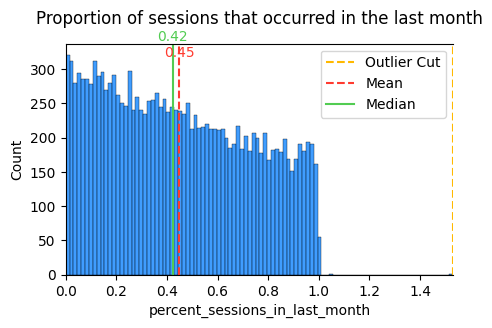

In [113]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_plot(df, 'percent_sessions_in_last_month', 'Proportion of sessions that occurred in the last month')

Check the median value of the `n_days_after_onboarding` variable.

In [112]:
### YOUR CODE HERE ###
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

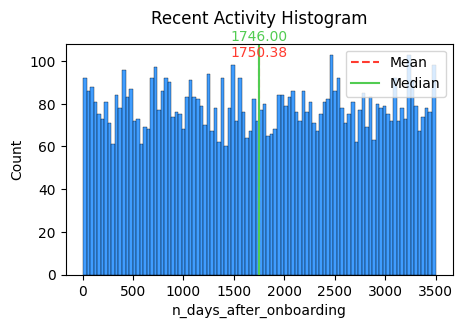

In [121]:
### YOUR CODE HERE ###
# Histogram
waze_histogram_plot(df[df["percent_sessions_in_last_month"] >= 0.4], 'n_days_after_onboarding', 'Recent Activity Histogram')

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [123]:
### YOUR CODE HERE ###
def impute_outliers(data, column):
    """
    Impute outliers in a given column of a DataFrame with the 95th percentile value.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        column (str): The name of the column with outliers to be imputed.

    Returns:
        pandas.DataFrame: The DataFrame with outliers imputed.
    """
    # Calculate the 95th percentile
    percentile_95 = np.percentile(data[column], 95)
    
    # Impute outliers with the 95th percentile value
    data.loc[data[column] > percentile_95, column] = percentile_95
    
    return data

# Example usage:
# df = impute_outliers(df, 'column_name')


Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [128]:
### YOUR CODE HERE ###
# Apply imputation to the specified columns
columns_to_impute = ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']

for column in columns_to_impute:
    df = impute_outliers(df, column)



Call `describe()` to see if your change worked.

In [127]:
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.030237,1749.837789,121.605974,29.672512,3939.631852,1789.643156,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.597994,1008.513876,148.121544,45.394651,2216.039474,1222.695112,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.341543,3500.000000,1236.000000,415.000000,8889.776003,4668.813959,31.000000,30.000000,15420.234110,1.530637


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?



==> ENTER YOUR RESPONSE HERE

I have learned ....

My other questions are ....

My client would likely want to know ...




Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

### **Task 4b. Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

4. What percentage of users churned and what percentage were retained?

5. What factors correlated with user churn? How?

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?


==> ENTER YOUR RESPONSES TO QUESTIONS 1-6 HERE




**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.